In [39]:
import pandas as pd
import numpy as np

In [40]:
loans = pd.read_csv('lending-club-data.csv')

/Users/mac/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
loans.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'is_inc_v', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans',
       'bad_loans', 'emp_length_num', 'grade_num', '

In [42]:
loans.head(6)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1
5,1072053,1288686,3000,3000,3000,36 months,18.64,109.43,E,E1,...,0.2,1.0,1.0,1.0,0,2.73575,20141201T000000,1,1,1


In [43]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x==0 else -1)
loans = loans.drop(columns='bad_loans')

In [44]:
len(loans[loans['safe_loans'] == 1])/len(loans)

0.8111853319957262

In [45]:
len(loans[loans['safe_loans'] != 1])/len(loans)

0.18881466800427382

In [46]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'

loans = loans[features + [target]]

In [47]:
encoded_loans = pd.get_dummies(loans)

In [48]:
train_idx = pd.read_json('module-5-assignment-1-train-idx.json')
validation_idx = pd.read_json('module-5-assignment-1-validation-idx.json')

In [49]:
train_data = encoded_loans.loc[train_idx[0]]
validation_data = encoded_loans.loc[validation_idx[0]]

In [50]:
safe_loans_raw = loans[loans[target] == +1]
risky_loans_raw = loans[loans[target] == -1]
print("Number of safe loans  : %s" % len(safe_loans_raw))
print("Number of risky loans : %s" % len(risky_loans_raw))

Number of safe loans  : 99457
Number of risky loans : 23150


In [51]:
print(train_data.dtypes)
print('<---------->')
print(validation_data.dtypes)

short_emp                       int64
emp_length_num                  int64
dti                           float64
last_delinq_none                int64
last_major_derog_none           int64
revol_util                    float64
total_rec_late_fee            float64
safe_loans                      int64
grade_A                         uint8
grade_B                         uint8
grade_C                         uint8
grade_D                         uint8
grade_E                         uint8
grade_F                         uint8
grade_G                         uint8
sub_grade_A1                    uint8
sub_grade_A2                    uint8
sub_grade_A3                    uint8
sub_grade_A4                    uint8
sub_grade_A5                    uint8
sub_grade_B1                    uint8
sub_grade_B2                    uint8
sub_grade_B3                    uint8
sub_grade_B4                    uint8
sub_grade_B5                    uint8
sub_grade_C1                    uint8
sub_grade_C2

In [52]:
from sklearn import tree

In [53]:
target = train_data['safe_loans']
features = train_data.columns
features = features.drop('safe_loans')

In [54]:
train_data[features].head()

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,grade_A,grade_B,grade_C,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
1,1,1,1.00,1,1,9.4,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0,5,5.55,1,1,32.6,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,1,1,18.08,1,1,36.5,0.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
10,1,1,10.08,1,1,91.7,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
12,0,4,7.06,1,1,55.5,0.0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [55]:
decision_tree_model=tree.DecisionTreeClassifier(max_depth=6)
decision_tree_model.fit(train_data[features],target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
small_model = tree.DecisionTreeClassifier(max_depth=2)
small_model.fit(train_data[features],target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
import graphviz

In [67]:
dot_data = tree.export_graphviz(small_model,out_file=None,feature_names=train_data[features].columns,rounded=True)

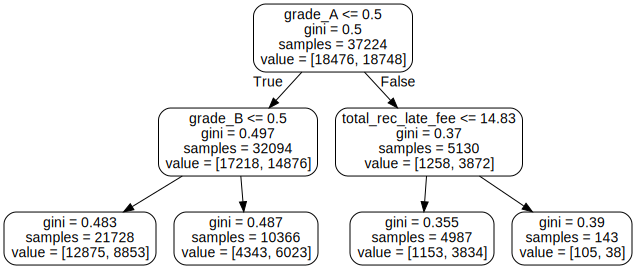

In [68]:
graph = graphviz.Source(dot_data)
graph

In [62]:
validation_safe_loans = validation_data[validation_data['safe_loans'] == 1]
validation_risky_loans = validation_data[validation_data['safe_loans'] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data


,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
19,0,11,11.18,1,1,82.4,0.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
79,0,10,16.85,1,1,96.4,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
24,0,3,13.97,0,1,59.5,0.0,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
41,0,11,16.33,1,1,62.1,0.0,-1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
sample_validation_data.columns.values

array(['short_emp', 'emp_length_num', 'dti', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee',
       'safe_loans', 'grade_A', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'sub_grade_A1', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'home_ownership_MORTGAGE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT', 'purpose_car',
       'purpose_credi

In [73]:
sample_output = sample_validation_data['safe_loans']
sample_features = sample_validation_data[sample_validation_data.columns.drop('safe_loans')]

In [75]:
result = decision_tree_model.predict(sample_features)

In [76]:
len(result == sample_output)/len(sample_output)

1.0

In [77]:
result

array([ 1, -1, -1,  1])

In [80]:
small_model.predict_proba(sample_features)

array([[0.41896585, 0.58103415],
       [0.59255339, 0.40744661],
       [0.59255339, 0.40744661],
       [0.23120112, 0.76879888]])

In [81]:
decision_tree_model.predict_proba(sample_features)

array([[0.34156543, 0.65843457],
       [0.53630646, 0.46369354],
       [0.64750958, 0.35249042],
       [0.20789474, 0.79210526]])

In [82]:
big_model=tree.DecisionTreeClassifier(max_depth=10)
big_model.fit(train_data[features],target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
big_model.score(train_data[features],target)

0.6637921770900495

In [85]:
big_model.score(validation_data[validation_data.columns.drop('safe_loans')],validation_data['safe_loans'])

0.6261309780267126

In [97]:
result_2 = decision = decision_tree_model.predict(validation_data[validation_data.columns.drop('safe_loans')])

In [98]:
false_postive = np.sum((result_2==1)&(validation_data['safe_loans']==-1))

In [99]:
false_postive

1661

In [100]:
false_negtive = np.sum((result_2==-1)&(validation_data['safe_loans']==1))

In [101]:
false_negtive

1715

In [102]:
correct_predictions = np.sum((result_2==1)&(validation_data['safe_loans']==1))

In [103]:
correct_predictions

2895

In [104]:
print(false_negtive*10000+20000*false_postive)

50370000
